In [2]:
from geopy.geocoders import Here
import json

In [3]:
with open('../accounts.json') as json_file:  
    data = json.load(json_file)

In [4]:
app_code = data['accounts']['Here']['app_code']
app_id = data['accounts']['Here']['app_id']
user_agent = data['accounts']['Here']['user_agent']
here = Here(app_code=app_code, app_id=app_id,user_agent=user_agent)

In [5]:
location = here.geocode('Carrer de Valencia 156')

In [6]:
location.raw

{'Relevance': 1.0,
 'MatchLevel': 'houseNumber',
 'MatchQuality': {'Street': [1.0], 'HouseNumber': 1.0},
 'MatchType': 'pointAddress',
 'Location': {'LocationId': 'NT_zAoUPgE4U3XaRhy2nApOGB_xUjN',
  'LocationType': 'point',
  'DisplayPosition': {'Latitude': 41.38621, 'Longitude': 2.15487},
  'NavigationPosition': [{'Latitude': 41.38628, 'Longitude': 2.15476}],
  'MapView': {'TopLeft': {'Latitude': 41.3873342, 'Longitude': 2.1533717},
   'BottomRight': {'Latitude': 41.3850858, 'Longitude': 2.1563683}},
  'Address': {'Label': 'Carrer de València, 156, 08011 Barcelona (Barcelona), Espanya',
   'Country': 'ESP',
   'State': 'Catalunya',
   'County': 'Barcelona',
   'City': 'Barcelona',
   'District': "l'Antiga Esquerra de l'Eixample",
   'Street': 'Carrer de València',
   'HouseNumber': '156',
   'PostalCode': '08011',
   'AdditionalData': [{'value': 'Espanya', 'key': 'CountryName'},
    {'value': 'Catalunya', 'key': 'StateName'},
    {'value': 'Barcelona', 'key': 'CountyName'}]}}}

In [7]:
type(location)

geopy.location.Location

In [8]:

# location.point['Address']['District']
location.raw['Location']['Address']['District']

"l'Antiga Esquerra de l'Eixample"

In [13]:
import telluric as tl
from telluric.constants import WGS84_CRS, WEB_MERCATOR_CRS

In [10]:
location.point.

Point(41.38621, 2.15487, 0.0)

/Users/seba/anaconda3/lib/python3.6/site-packages/telluric/plotting.py:171: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


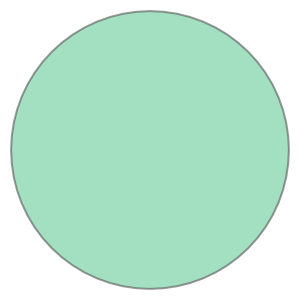

In [37]:
(
    tl.GeoVector.point(location.point.longitude, location.point.latitude)
    .reproject(WEB_MERCATOR_CRS)
    .buffer(1000)
)

In [ ]:
_.to_record(WGS84_CRS)

In [25]:
locations = here.reverse(location.point, 1200, exactly_one=False,maxresults=100)

In [35]:
locations[52].raw['Location']['Address']['District']

"l'Antiga Esquerra de l'Eixample"

In [110]:
chicos_place = here.geocode('Universitat 14, Barcelona')

In [111]:
chicos_place.raw

{'Relevance': 1.0,
 'MatchLevel': 'houseNumber',
 'MatchQuality': {'City': 1.0, 'Street': [0.9], 'HouseNumber': 1.0},
 'MatchType': 'pointAddress',
 'Location': {'LocationId': 'NT_CqK9A7WbaytSUW7RPD.B9C_xQD',
  'LocationType': 'point',
  'DisplayPosition': {'Latitude': 41.38666, 'Longitude': 2.16702},
  'NavigationPosition': [{'Latitude': 41.3868, 'Longitude': 2.16692}],
  'MapView': {'TopLeft': {'Latitude': 41.3877842, 'Longitude': 2.1655217},
   'BottomRight': {'Latitude': 41.3855358, 'Longitude': 2.1685183}},
  'Address': {'Label': 'Ronda de la Universitat, 14, 08007 Barcelona (Barcelona), Espanya',
   'Country': 'ESP',
   'State': 'Catalunya',
   'County': 'Barcelona',
   'City': 'Barcelona',
   'District': "Dreta de l'Eixample",
   'Street': 'Ronda de la Universitat',
   'HouseNumber': '14',
   'PostalCode': '08007',
   'AdditionalData': [{'value': 'Espanya', 'key': 'CountryName'},
    {'value': 'Catalunya', 'key': 'StateName'},
    {'value': 'Barcelona', 'key': 'CountyName'}]}}}